### Problem Set 7: Anomaly Detection

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go

#### **The Dataset** 

Source: Boston House Prices. Kaggle Repositories. https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data. 

This is a multivariate dataset explaining the relationship of different factors like crime rate, proportion of land zoned for large lots, air quality, and accessibility to highways, along with the median value of owner-occupied homes at the time. It is composed of 13 features and a label column, each with 506 instances. Every feature was tested to see which is most similar to a Gausian distribution and was concluded to use the average number of rooms per dwelling(RM).

Features include:
1. **CRIM** per capita crime rate by town

2. **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

3. **INDUS** proportion of non-retail business acres per town

4. **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. **NOX** nitric oxides concentration (parts per 10 million)

6. **RM** average number of rooms per dwelling

7. **AGE** proportion of owner-occupied units built prior to 1940

8. **DIS** weighted distances to five Boston employment centres

9. **RAD** index of accessibility to radial highways

10. **TAX** full-value property-tax rate per dollar 10,000.

11. **PTRATIO** pupil-teacher ratio by town

12. **B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. **LSTAT** % lower status of the population

14. **MEDV** Median value of owner-occupied homes in $1000's

In [334]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', delim_whitespace=True, names=features)

data.shape

(506, 14)

In [335]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Finding Feature similar to Gausian Distribution 

C:\Users\Bazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



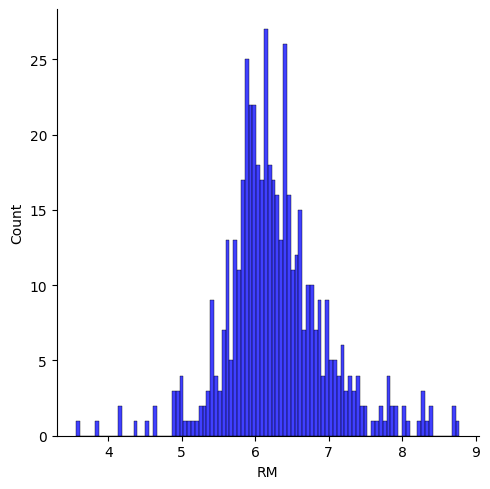

In [336]:
feature_name = data.iloc[:,5:6].columns
plt.figure
for i, cn in enumerate(data[feature_name]):
    sns.displot(data[cn], bins=100, color='b')
plt.show()

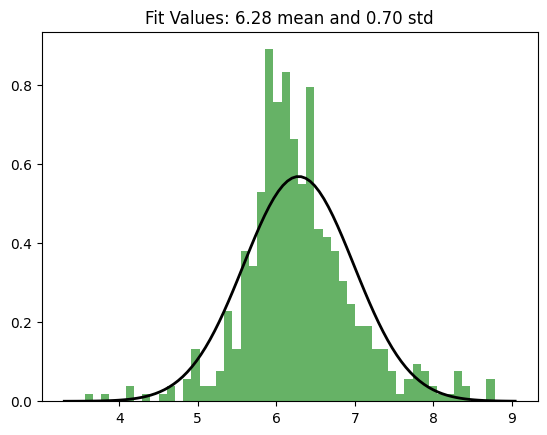

In [337]:
mu, std = norm.fit(data[feature_name]) 
  
plt.hist(data[feature_name], bins=50, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} mean and {:.2f} std".format(mu, std)
plt.title(title)
  
plt.show()

#### Modeling Data with Gausian Distribution

In [338]:
def estimateGaussian(x):
    mu = np.mean(x, axis=0)
    sigma = np.cov(x.T)
    print(mu)
    print(sigma)
    return mu, sigma

def multivariateGaussian(x,mu,sigma):
    g = multivariate_normal(mean=mu, cov=sigma)
    return g.pdf(x)

In [339]:
X = data.iloc[:,5:6]
X.to_numpy()
mu, sigma = estimateGaussian(X)
p = multivariateGaussian(X,mu,sigma)

RM    6.284634
dtype: float64
0.493670850221109


#### Getting the minimum, maximum, mean, and variance

In [340]:
print(f"Minimum: {min(p)}")
print(f"Maximum: {max(p)}")

idx = np.argpartition(p,10)
a = p[idx[:10]]
a.sort()
print(f"First 10 Minimum: {a}")

v = np.var(p)
m = sum(p) / len(p)
print(f"Mean: {m}")
print(f"Variance: {v}")

Minimum: 0.0003098924853836772
Maximum: 0.567793613657045
First 10 Minimum: [0.00030989 0.0010357  0.00136346 0.0014952  0.00151193 0.00533689
 0.00533689 0.00616067 0.00679448 0.00796895]
Mean: 0.42720604548987623
Variance: 0.02545791888280448


#### Setting the threshold value

In [341]:
predictions = (p < v)
anomalyg = X[predictions == True]
anomaly_indexg = list(anomalyg.index)
anomalyg.to_numpy()

array([[8.069],
       [8.375],
       [8.266],
       [8.725],
       [8.04 ],
       [8.337],
       [8.247],
       [8.259],
       [8.704],
       [8.398],
       [8.297],
       [8.78 ],
       [3.561],
       [3.863],
       [4.138],
       [4.368],
       [4.138],
       [4.519]])

#### Displaying anomalies in dataset using assigned threshold

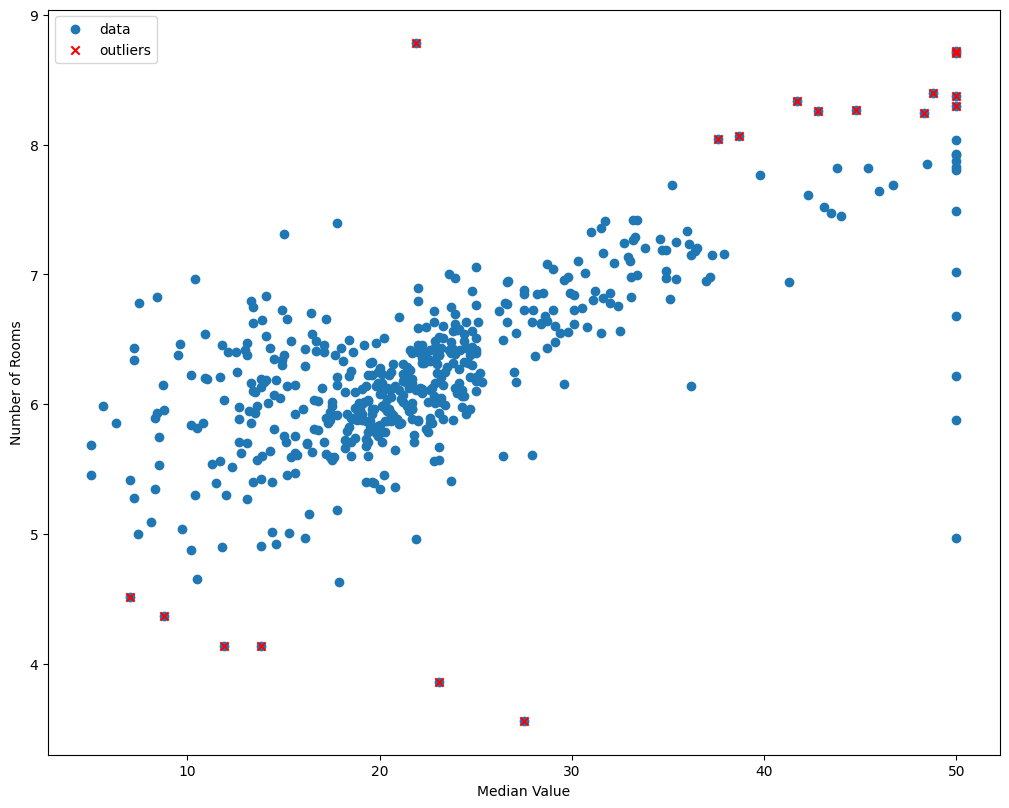

In [342]:
# x-axis: Median value   
# y-axis: Number of rooms 
X_axis = list(data.iloc[:,13]) 
Y_axis = list(data.iloc[:,5])

# find where the outliers are occurred
tt=data.iloc[:,13]
tt.to_numpy()
anomalygx = tt[predictions == True]

# x-axis: Median value of Outliers  
# y-axis: outlires in Number of rooms
Xano=list(anomalygx)
Yano=anomalyg
fig=plt.figure(figsize=(10,8))

# plot Number of rooms and its outliers
plot=plt.scatter(X_axis, Y_axis,label = "data")
plot=plt.scatter(Xano, Yano, marker='x', color='red',label="outliers")

# Displaying Plot
plt.tight_layout()
plt.xlabel("Median Value")
plt.ylabel("Number of Rooms")
plt.legend()
plt.show()

#### Displaying anomalies among probability

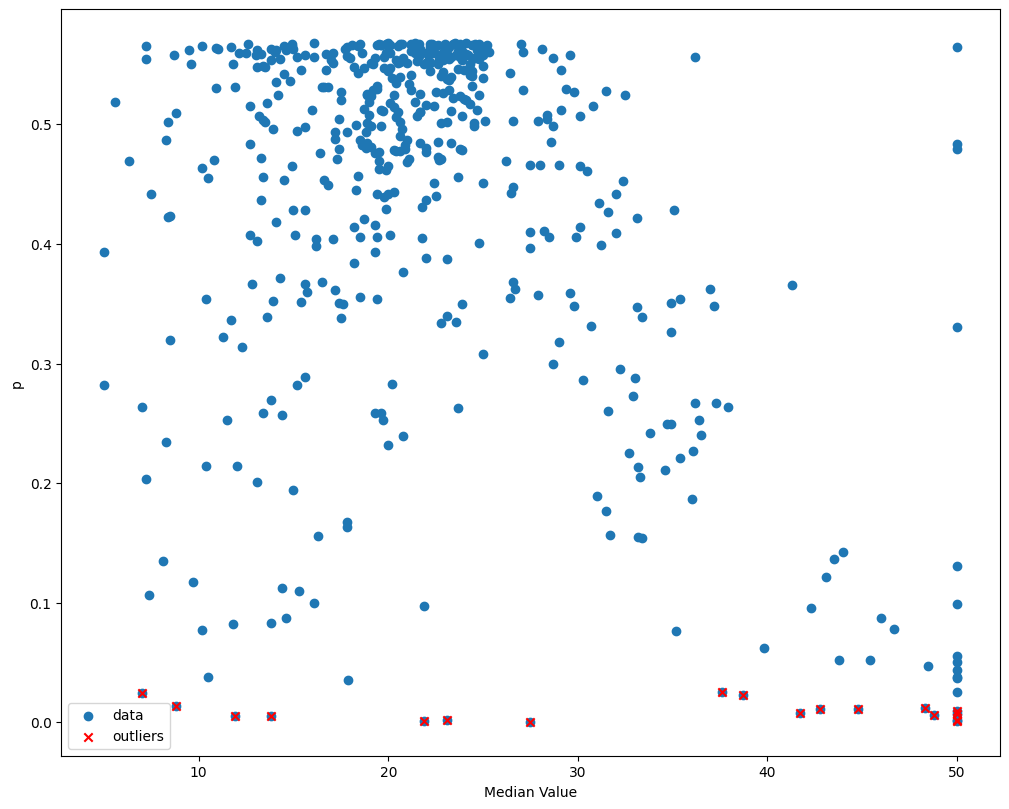

In [343]:
# x-axis: Median value   
# y-axis: p
X1 = list(data.iloc[:,13])
Yp = list(p)

# find where the outliers are occurred
tt = data.iloc[:,13]
tt.to_numpy()
anomalygx=tt[predictions == True]

# x-axis: Median value of Outliers  
# y-axis: outlires in p
Xano = list(anomalygx)
Ypano = p[predictions == True]
fig = plt.figure(figsize = (10,8))
plot = plt.scatter(X1, Yp, label="data")
plot = plt.scatter(Xano,Ypano, marker='x', color='red',label="outliers")

plt.tight_layout()
plt.xlabel("Median Value")
plt.ylabel("p")
plt.legend()
plt.show()

#### Setting threshold using KMeans

In [360]:
sil = []
kmax = 150

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init='auto', random_state=42).fit(p.reshape(-1,1))
  labels = kmeans.labels_
  sil.append(silhouette_score(p.reshape(-1,1), labels, metric = 'euclidean'))
  if (k>2 and abs(sil[k-3]-sil[k-2])<0.00005):
        break

k_cluster=k

print(f"Number of clusters: {k_cluster}")

Number of clusters: 91


In [361]:
kmeans = KMeans(n_clusters=k_cluster, n_init='auto', random_state=42).fit(p.reshape(-1,1))

print(kmeans)

KMeans(n_clusters=91, n_init='auto', random_state=42)


#### Assigning different colors for each cluster

In [362]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):

    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np
    import sys


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in list(range(nlabels))]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')
 
    return random_colormap

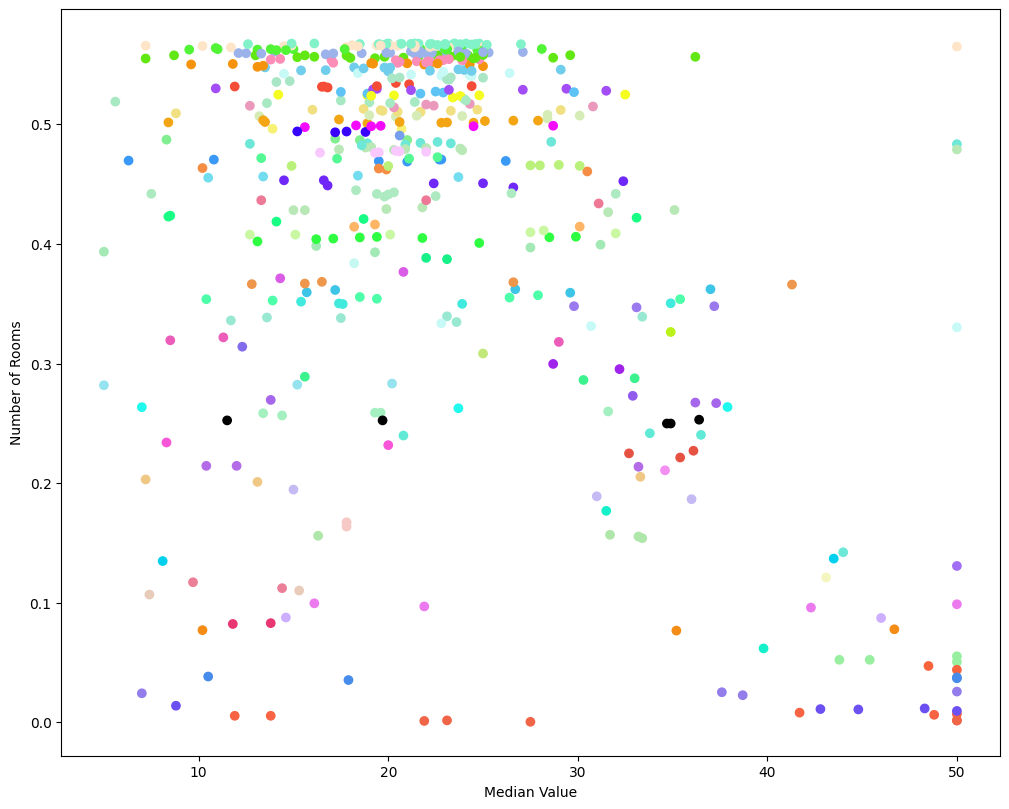

In [363]:
new_cmap = rand_cmap(k_cluster, type='bright', first_color_black=True, last_color_black=False, verbose=False)
fig=plt.figure(figsize=(10,8))
plt.scatter(X1, Yp, c=kmeans.labels_, cmap=new_cmap, vmin=0, vmax=k_cluster)
plt.tight_layout()
plt.xlabel("Median Value")
plt.ylabel("Number of Rooms")
plt.show()

In [364]:
centroids = kmeans.cluster_centers_
centroids.T.sort() 

In [365]:
predictions1 = (p <=  centroids[0])
anomalygserious=X[predictions1==True]
anomaly_indexg=list(anomalyg.index)
anomalyg.to_numpy()

array([[8.725],
       [8.704],
       [3.863],
       [4.138],
       [4.138]])

In [366]:
predictions2 = ((p<= centroids[1] ) & (p>centroids[0]))
anomalyg=X[predictions2==True]
anomaly_indexg=list(anomalyg.index)
anomalyg.to_numpy()

array([[8.725],
       [8.704],
       [8.398],
       [3.863],
       [4.138],
       [4.138]])

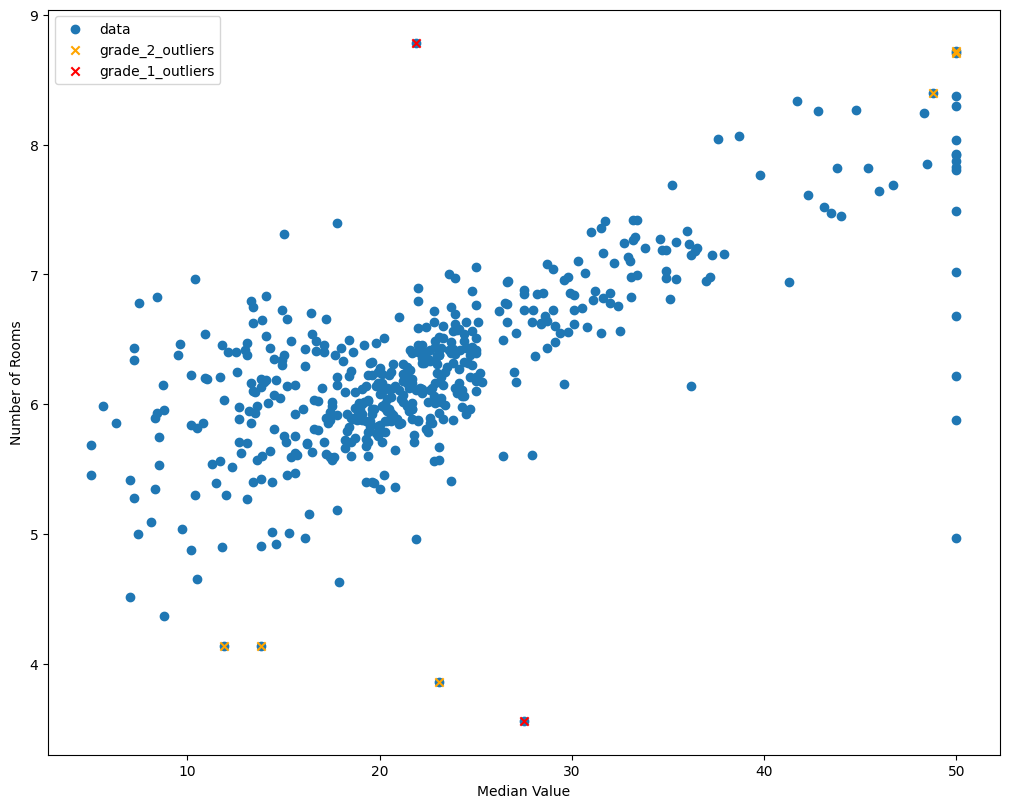

In [367]:
X1 = list(data.iloc[:,13])
Y = list(data.iloc[:,5])

tt = data.iloc[:,13]
tt.to_numpy()
anomalygx=tt[predictions1==True]
Xanoserious=list(anomalygx)
Yanoserious=anomalygserious
anomalygx=tt[predictions2==True]
Xano=list(anomalygx)
Yano=anomalyg
fig=plt.figure(figsize=(10,8))

plot=plt.scatter(X1, Y,label="data")
plot=plt.scatter(Xano,Yano, marker='x', color='orange',label="grade_2_outliers")
plot=plt.scatter(Xanoserious,Yanoserious, marker='x', color='red',label="grade_1_outliers")

plt.tight_layout()
plt.xlabel("Median Value")
plt.ylabel("Number of Rooms")
plt.legend()
plt.show()

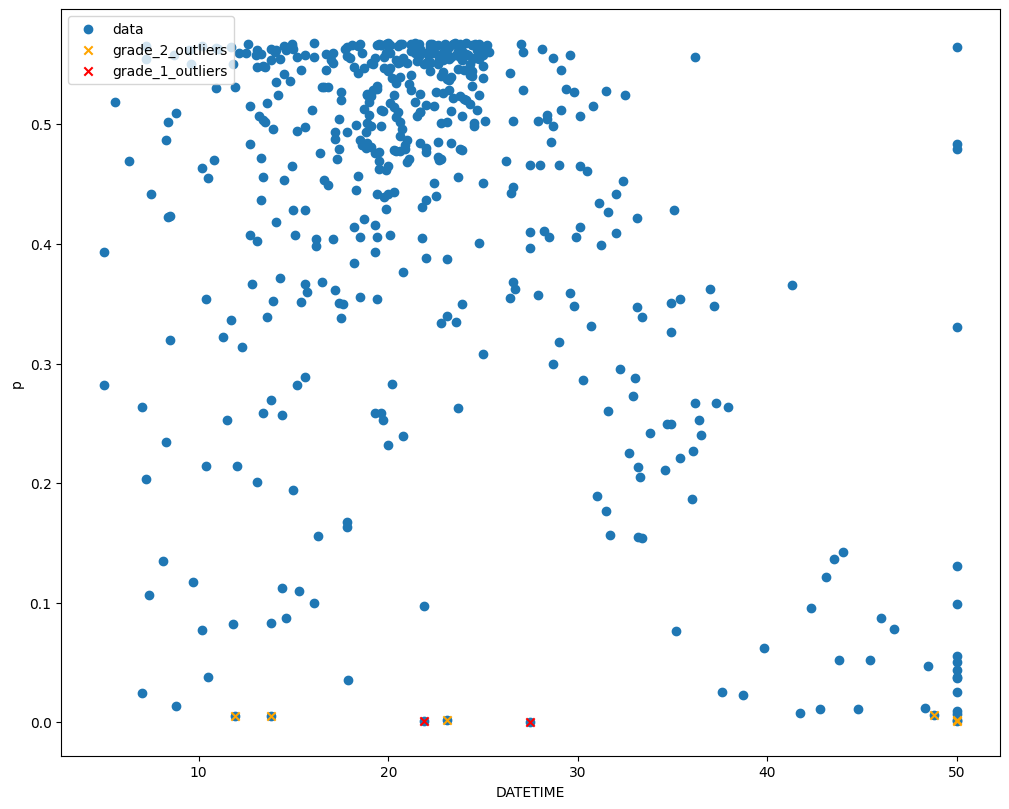

In [369]:
X1 = list(data.iloc[:,13])
Yp = list(p)
tt=data.iloc[:,13]
tt.to_numpy()
anomalygx=tt[predictions1==True]
Xanoserious=list(anomalygx)
Ypanoserious=p[predictions1==True]
anomalygx=tt[predictions2==True]
Xano=list(anomalygx)
Ypano=p[predictions2==True]
fig=plt.figure(figsize=(10,8))

plot=plt.scatter(X1, Yp,label="data")
plot=plt.scatter(Xano,Ypano, marker='x', color='orange',label="grade_2_outliers")
plot=plt.scatter(Xanoserious,Ypanoserious, marker='x', color='red',label="grade_1_outliers")

plt.tight_layout()
plt.xlabel("DATETIME")
plt.ylabel("p")
plt.legend(loc='upper left')
# Display
plt.show()

#### **Results**

Given the selected feature from the dataset with a distribution similar to a Gausian distribution, two methods were utilized in identifying the anomalies from the data. The first method was setting a specific threshold to identify the outliers. The second method utilizes the K-means clustering by dividing the data into clusters then using silhoutte score to identify outliers. Compared to the first method, K-means is less reliant on manually defined thresholds hence, reducing the potential of innacuracy. However, the disadvantage of this method lies on its computational cost on large data sets. 